In [99]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [4]:
df = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\Miles_traveled.csv')

In [6]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [8]:
df.tail()

,DATE,TRFVOLUSM227NFWA
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


In [10]:
len(df)

588

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [14]:
df.columns = ['ds','y']

In [16]:
df['ds'] = pd.to_datetime(df['ds'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      588 non-null    datetime64[ns]
 1   y       588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


<Axes: xlabel='ds'>

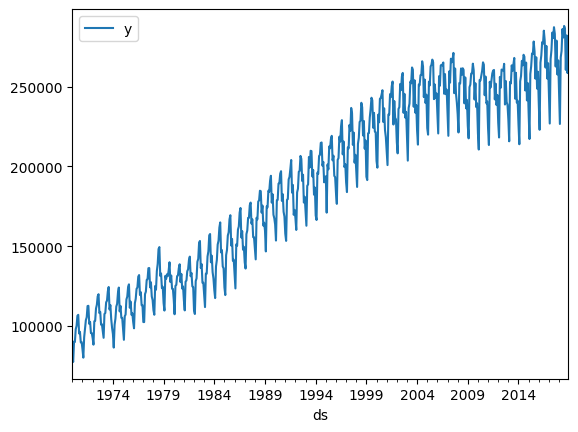

In [20]:
df.plot('ds','y')

# Split

In [23]:
# Prédiction de 12 mois
train = df.iloc[:576]
test = df.iloc[576:]

In [25]:
m = Prophet()
m.fit(train)

17:24:11 - cmdstanpy - INFO - Chain [1] start processing
17:24:11 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=12, freq='MS')    # 12 mois à prédire

In [29]:
forecast = m.predict(future)

In [33]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94271.491440,70615.851953,81213.783790,94271.491440,94271.491440,-18592.009874,-18592.009874,-18592.009874,-18592.009874,-18592.009874,-18592.009874,0.0,0.0,0.0,75679.481566
1,1970-02-01,94581.319896,62028.190019,73201.556368,94581.319896,94581.319896,-27104.937367,-27104.937367,-27104.937367,-27104.937367,-27104.937367,-27104.937367,0.0,0.0,0.0,67476.382529
2,1970-03-01,94861.164953,89162.142094,100862.237812,94861.164953,94861.164953,-31.160435,-31.160435,-31.160435,-31.160435,-31.160435,-31.160435,0.0,0.0,0.0,94830.004518
3,1970-04-01,95170.993409,89377.639622,101173.411793,95170.993409,95170.993409,30.939113,30.939113,30.939113,30.939113,30.939113,30.939113,0.0,0.0,0.0,95201.932522
4,1970-05-01,95470.827398,99595.760102,110987.354097,95470.827398,95470.827398,9618.637856,9618.637856,9618.637856,9618.637856,9618.637856,9618.637856,0.0,0.0,0.0,105089.465254


In [49]:
forecast.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
576,2018-01-01,262461.081132,238161.423333,249322.445297,262461.081132,262461.081132,-18592.009874,-18592.009874,-18592.009874,-18592.009874,-18592.009874,-18592.009874,0.0,0.0,0.0,243869.071258
577,2018-02-01,262603.313199,229753.573549,241188.198815,262603.313199,262603.313199,-27104.937367,-27104.937367,-27104.937367,-27104.937367,-27104.937367,-27104.937367,0.0,0.0,0.0,235498.375832
578,2018-03-01,262731.780873,257336.549059,268845.171266,262731.780873,262731.780873,-31.160435,-31.160435,-31.160435,-31.160435,-31.160435,-31.160435,0.0,0.0,0.0,262700.620438
579,2018-04-01,262874.012940,257584.575112,268972.074898,262874.012940,262874.012940,30.939113,30.939113,30.939113,30.939113,30.939113,30.939113,0.0,0.0,0.0,262904.952053
580,2018-05-01,263011.656876,267098.155323,278455.464080,263011.643000,263020.243995,9618.637856,9618.637856,9618.637856,9618.637856,9618.637856,9618.637856,0.0,0.0,0.0,272630.294732
581,2018-06-01,263153.888943,267028.098861,278552.932706,263141.381961,263181.073172,9729.419656,9729.419656,9729.419656,9729.419656,9729.419656,9729.419656,0.0,0.0,0.0,272883.308600
582,2018-07-01,263291.532879,273848.693203,284912.055513,263255.164621,263342.334537,16051.396481,16051.396481,16051.396481,16051.396481,16051.396481,16051.396481,0.0,0.0,0.0,279342.929360
583,2018-08-01,263433.764946,274322.522893,285457.142019,263367.073657,263509.925821,16446.103774,16446.103774,16446.103774,16446.103774,16446.103774,16446.103774,0.0,0.0,0.0,279879.868721
584,2018-09-01,263575.997014,255914.406786,267920.197541,263485.620657,263680.366694,-1672.204614,-1672.204614,-1672.204614,-1672.204614,-1672.204614,-1672.204614,0.0,0.0,0.0,261903.792400
585,2018-10-01,263713.640950,263168.237345,274487.566297,263592.908120,263863.319101,5303.845016,5303.845016,5303.845016,5303.845016,5303.845016,5303.845016,0.0,0.0,0.0,269017.485965


<Axes: xlabel='ds'>

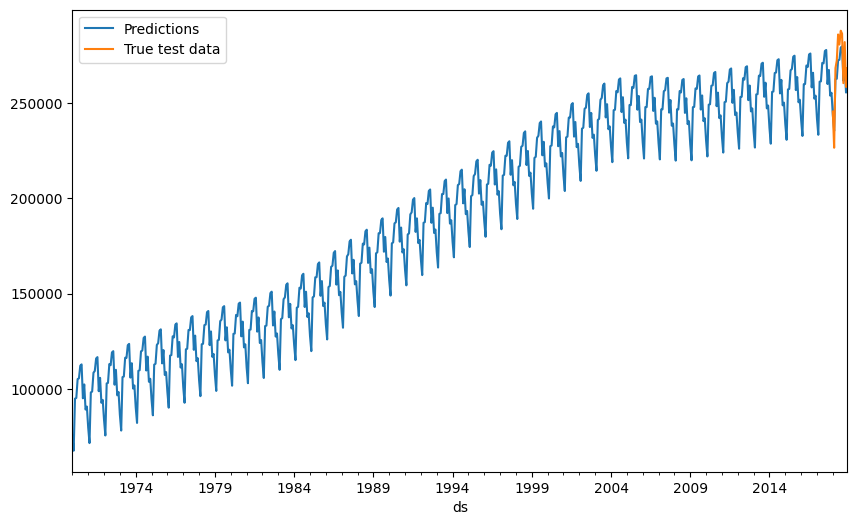

In [47]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True, figsize=(10,6))
test.plot(x='ds',y='y',label='True test data', legend=True, ax=ax)

(576.0, 588.0)

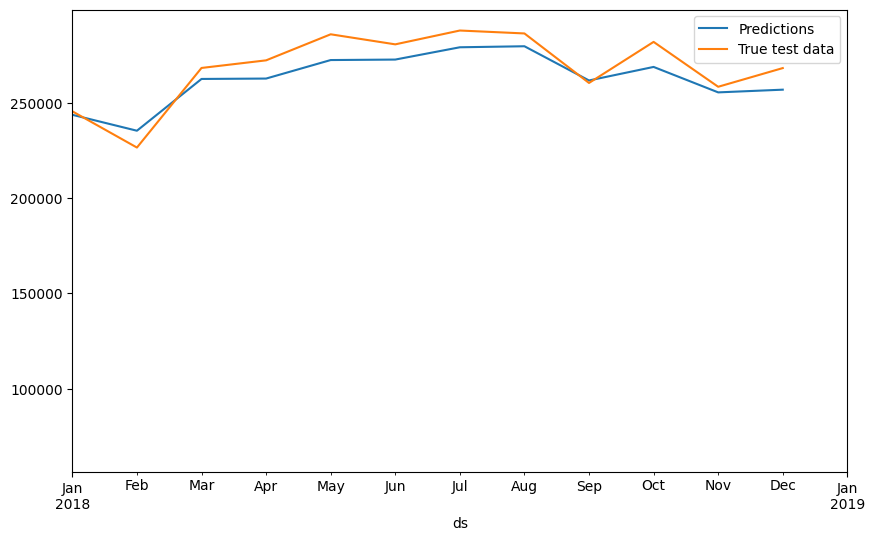

In [53]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True, figsize=(10,6))
test.plot(x='ds',y='y',label='True test data', legend=True, ax=ax)
plt.xlim(pd.to_datetime('2018-01-01'),pd.to_datetime('2019-01-01'))

In [89]:
predictions = forecast['yhat'].iloc[-12:]

rmse(predictions, test['y'])

8604.302194732814

In [91]:
test['y'].mean()

268739.6666666667

In [93]:
rmse(test['y'], predictions) * 100 / test['y'].mean()

3.2017239216885787

# Cross Validation

## initial / cutoff / horizon

In [114]:
# Initial (periode 5 years)
initial = 5 * 365
initial = str(initial) + ' days'

In [116]:
# Period
period = 5 * 365
period = str(period) + ' days'

In [118]:
# Horizon
horizon = 365
horizon = str(horizon) + ' days'

In [120]:
df_cv = cross_validation(m,initial=initial, period=period,horizon=horizon)

  0%|          | 0/9 [00:00<?, ?it/s]

18:45:26 - cmdstanpy - INFO - Chain [1] start processing
18:45:27 - cmdstanpy - INFO - Chain [1] done processing
18:45:27 - cmdstanpy - INFO - Chain [1] start processing
18:45:27 - cmdstanpy - INFO - Chain [1] done processing
18:45:27 - cmdstanpy - INFO - Chain [1] start processing
18:45:27 - cmdstanpy - INFO - Chain [1] done processing
18:45:28 - cmdstanpy - INFO - Chain [1] start processing
18:45:28 - cmdstanpy - INFO - Chain [1] done processing
18:45:28 - cmdstanpy - INFO - Chain [1] start processing
18:45:28 - cmdstanpy - INFO - Chain [1] done processing
18:45:28 - cmdstanpy - INFO - Chain [1] start processing
18:45:28 - cmdstanpy - INFO - Chain [1] done processing
18:45:28 - cmdstanpy - INFO - Chain [1] start processing
18:45:29 - cmdstanpy - INFO - Chain [1] done processing
18:45:29 - cmdstanpy - INFO - Chain [1] start processing
18:45:29 - cmdstanpy - INFO - Chain [1] done processing
18:45:29 - cmdstanpy - INFO - Chain [1] start processing
18:45:29 - cmdstanpy - INFO - Chain [1]

In [124]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.045736,107013.386170,109792.826931,102445.0,1976-12-11
1,1977-02-01,102996.069494,101593.780936,104459.132126,102416.0,1976-12-11
2,1977-03-01,118973.276565,117432.416876,120364.304018,119960.0,1976-12-11
3,1977-04-01,120612.885433,119219.888525,122114.372961,121513.0,1976-12-11
4,1977-05-01,127882.985779,126243.411684,129369.076675,128884.0,1976-12-11


In [126]:
len(df_cv)

108

In [132]:
# len(df) / 5 periodes (5*365)
len(df)/len(df_cv)

5.444444444444445

In [134]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.444316e+07,4944.002132,4543.524001,0.027822,0.023395,0.027403,0.3
1,53 days,2.194478e+07,4684.526050,4278.142802,0.025076,0.023395,0.024777,0.3
2,54 days,1.850311e+07,4301.523929,3755.453769,0.020194,0.022195,0.020035,0.4
3,55 days,2.338050e+07,4835.338344,4274.607033,0.023245,0.023395,0.022996,0.3
4,57 days,2.120514e+07,4604.904249,4014.174881,0.021540,0.022195,0.021331,0.4
...,...,...,...,...,...,...,...,...
94,360 days,1.856034e+07,4308.171304,3760.668727,0.019600,0.019726,0.019607,0.5
95,361 days,1.763795e+07,4199.756090,3480.698150,0.018200,0.018869,0.018218,0.5
96,362 days,3.198060e+07,5655.139536,4409.507626,0.022012,0.024765,0.021910,0.4
97,364 days,3.018403e+07,5493.999829,4241.143037,0.021382,0.021611,0.021293,0.5


### mape : pourcentage rapport entre mae et moyenne de test

C:\Users\nico_\anaconda3\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\nico_\anaconda3\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


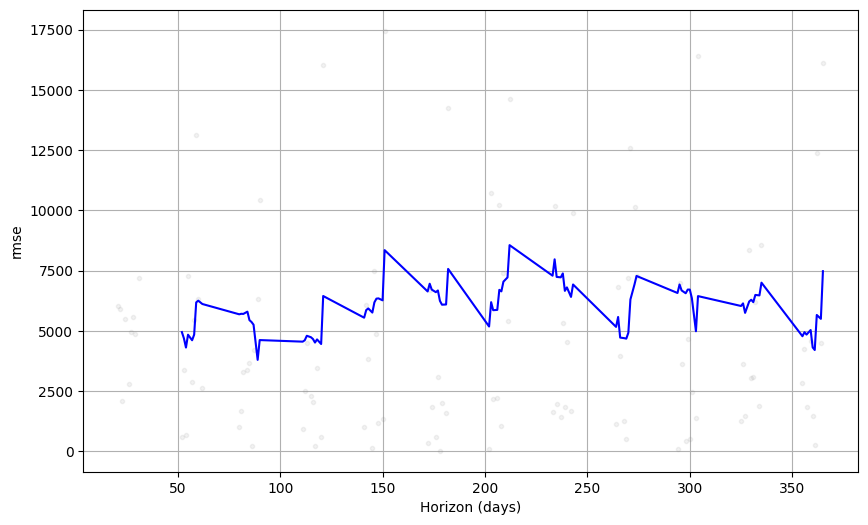

In [140]:
plot_cross_validation_metric(df_cv,metric='rmse');

C:\Users\nico_\anaconda3\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\nico_\anaconda3\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


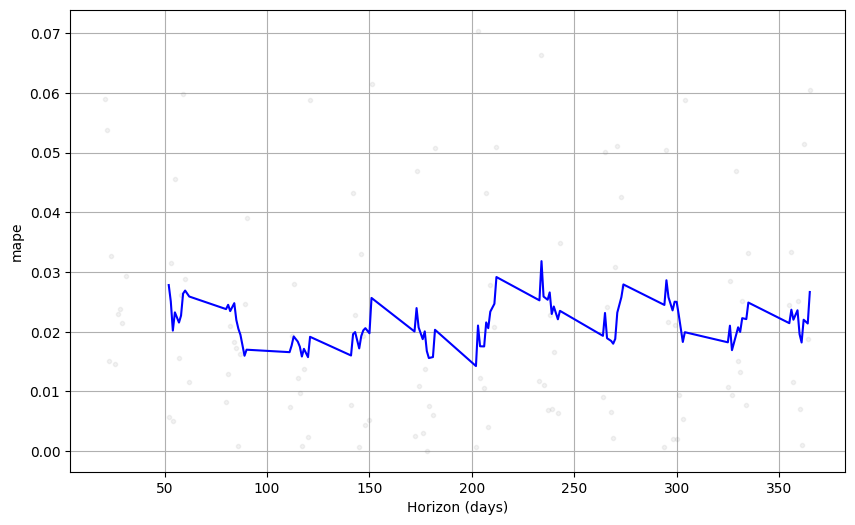

In [142]:
plot_cross_validation_metric(df_cv,metric='mape');